In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [14]:
# Load the data for my Netflix activity
pwd = %pwd
netflix_raw = pd.read_csv(pwd + '/datasets/own/netflix_viewing_activity.csv')

In [15]:
# Check raw data
netflix_raw.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alexandra,2021-01-30 23:35:49,00:03:05,Autoplayed: user action: None;,How I Met Your Mother: Season 8: The Ashtray (...,NaN,Samsung CE 2020 Nike-L UHD TV (2G) Smart TV,00:03:06,00:03:06,SE (Sweden)
1,Alexandra,2021-01-30 23:14:31,00:21:17,Autoplayed: user action: None;,How I Met Your Mother: Season 8: Bad Crazy (Ep...,NaN,Samsung CE 2020 Nike-L UHD TV (2G) Smart TV,00:21:18,00:21:18,SE (Sweden)
2,Alexandra,2021-01-30 22:53:09,00:21:21,Autoplayed: user action: None;,How I Met Your Mother: Season 8: P.S. I Love Y...,NaN,Samsung CE 2020 Nike-L UHD TV (2G) Smart TV,00:21:21,00:21:21,SE (Sweden)
3,Alexandra,2021-01-30 22:39:27,00:13:37,Autoplayed: user action: Unspecified;,How I Met Your Mother: Season 8: Ring Up! (Epi...,NaN,Samsung CE 2020 Nike-L UHD TV (2G) Smart TV,00:21:17,00:21:17,SE (Sweden)
4,Alexandra,2021-01-30 12:49:12,00:14:54,NaN,Surviving Death: Season 1: Near-Death Experien...,NaN,Samsung CE 2020 Nike-L UHD TV (2G) Smart TV,00:14:54,00:14:54,SE (Sweden)


In [16]:
# Check the data types
netflix_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             4396 non-null   object
 1   Start Time               4396 non-null   object
 2   Duration                 4396 non-null   object
 3   Attributes               3075 non-null   object
 4   Title                    4396 non-null   object
 5   Supplemental Video Type  1926 non-null   object
 6   Device Type              4396 non-null   object
 7   Bookmark                 4396 non-null   object
 8   Latest Bookmark          4396 non-null   object
 9   Country                  4396 non-null   object
dtypes: object(10)
memory usage: 343.6+ KB


In [17]:
# Create column with year & month
netflix_raw['Year Month'] = pd.to_datetime(netflix_raw['Start Time']).dt.to_period('M')

In [18]:
# Create column for duration in minutes
netflix_raw['Duration (min)'] = netflix_raw['Duration'].str.split(':').apply(
    lambda x: float(x[0]) * 60.0 + float(x[1]) + float(x[2]) / 60.0)

In [19]:
# Select data for only 2020
netflix_2020 = netflix_raw[netflix_raw['Year Month'].dt.year == 2020]

# Select data for only 2019
netflix_2019 = netflix_raw[netflix_raw['Year Month'].dt.year == 2019]

In [20]:
# Sum duration per month for 2020
netflix_2020_sum = netflix_2020.groupby(['Year Month']).sum()
netflix_2020_sum['Duration (hours)'] = netflix_2020_sum['Duration (min)']/60.0
netflix_2020_sum['Duration (days)'] = netflix_2020_sum['Duration (hours)']/24.0

In [21]:
# Sum duration per month for 2019
netflix_2019_sum = netflix_2019.groupby(['Year Month']).sum()
netflix_2019_sum['Duration (hours)'] = netflix_2019_sum['Duration (min)']/60.0
netflix_2019_sum['Duration (days)'] = netflix_2019_sum['Duration (hours)']/24.0

In [22]:
# Add missing months with 0 for Duration fro 2019
idx = pd.period_range(min(netflix_2019_sum.index), max(netflix_2019_sum.index))
netflix_2019_sum = netflix_2019_sum.reindex(idx, fill_value=0)

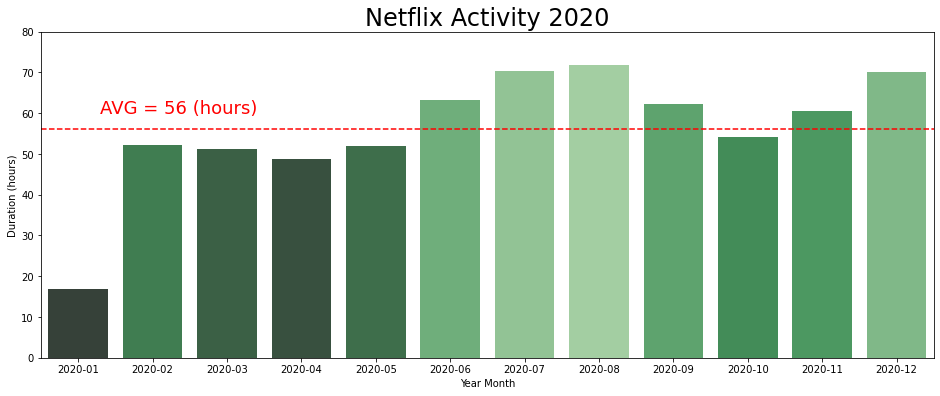

In [23]:
# Plot for 2020
fig, ax = plt.subplots()
fig.set_size_inches((16,6))

# Create pallete for the barplot based on y-values
pal = sns.color_palette("Greens_d", len(netflix_2020_sum))
rank = netflix_2020_sum['Duration (hours)'].argsort().argsort()

# Use seaborn to draw a barplot
sns.barplot(x=netflix_2020_sum.index,y='Duration (hours)',data=netflix_2020_sum,ax=ax, palette=np.array(pal[::-1])[rank])

# Set the title
ax.set_title('Netflix Activity 2020', fontsize=24)

# Set the y limit
ax.set_ylim([0, 80])

# Add a horizontal line with the duration avg in hours
ax.axhline(netflix_2020_sum['Duration (hours)'].mean(), ls='--', color = 'red')
ax.text(0.3, 60,'AVG = ' + str(int(netflix_2020_sum['Duration (hours)'].mean())) + ' (hours)', 
        fontsize=18, color = 'red')
plt.show()

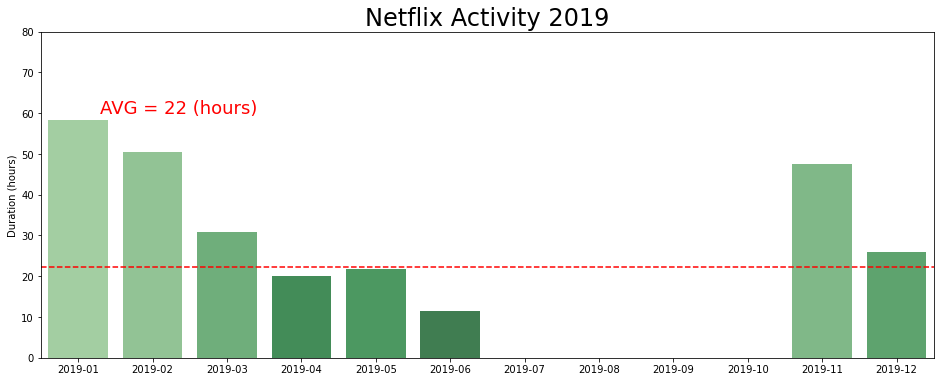

In [24]:
# Plot for 2019
fig, ax = plt.subplots()
fig.set_size_inches((16,6))

# Create pallete for the barplot based on y-values
pal = sns.color_palette("Greens_d", len(netflix_2019_sum))
rank = netflix_2019_sum['Duration (hours)'].argsort().argsort()

# Use seaborn to draw a barplot
sns.barplot(x=netflix_2019_sum.index,y='Duration (hours)',data=netflix_2019_sum,ax=ax, palette=np.array(pal[::-1])[rank])

# Set the title
ax.set_title('Netflix Activity 2019', fontsize=24)

# Set the y limit
ax.set_ylim([0, 80])

# Add a horizontal line with the duration avg in hours
ax.axhline(netflix_2019_sum['Duration (hours)'].mean(), ls='--', color = 'red')
ax.text(0.3, 60,'AVG = ' + str(int(netflix_2019_sum['Duration (hours)'].mean())) + ' (hours)', 
        fontsize=18, color = 'red')
plt.show()